
# Machine Learning Assignment: Marketing Campaign Performance Prediction

Objective: Your task is to build a machine learning model that predicts the conversion rate of marketing campaigns based on various features.


# Tasks

` 1)Data Exploration and Preprocessing:`

- Explore the dataset to understand its characteristics.
- Handle any missing or anomalous data.
- Perform any necessary data transformation or scaling.

` 2)Feature Engineering:`
- Create new features if needed.
- Select relevant features for the model.

` 3)Model Building and Evaluation:`
- Choose a suitable machine learning algorithm for this regression problem.
- Train and validate your model. You may split the data into training and validation sets.
- Evaluate the model performance using appropriate metrics (e.g., RMSE, MAE).

` 4)Model Interpretation:`
- Interpret the results and provide insights.
- Discuss the importance of different features and their impact on the conversion rate.

` 5)Report and Code:`
-Prepare a brief report summarizing your methodology, findings, and any assumptions made.
-Include visualizations to support your analysis.
-Provide well-documented and clean code in a Jupyter Notebook or Python script.

### Submission Guidelines:
Submit your report and code through a collab notebook or a github repo
Ensure your code is reproducible and includes comments explaining your logic.
If you have made any assumptions or simplifications, clearly state them in your report.

### Evaluation Criteria:
Understanding of machine learning concepts and algorithms.
Ability to preprocess and analyze data effectively.
Quality and clarity of the code.
Insights and interpretation of the model's results.
Overall approach to solving the problem and communication in the report.


In [2]:
#!pip install missingno


import pandas as pd
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50






df = pd.read_csv('/home/ozkan/zAssignment/marketing_campaign_data_socail_media.csv',encoding='utf-8')
df.head(5)

,Campaign_Type,Duration,Budget,Audience_Size,Audience_Age_Group,Engagement_Rate,Conversion_Rate
0,Instagram,45,95.802761,75579,35-44,7.775563,1.890406
1,YouTube,26,84.123524,88376,18-24,1.971576,4.269139
2,Instagram,50,91.688038,99427,25-34,5.504620,0.702806
3,YouTube,41,61.214077,40325,25-34,7.387365,2.035973
4,YouTube,40,74.356604,10775,18-24,4.336349,4.858624


Campaign_Type         0.0
Duration              0.0
Budget                0.0
Audience_Size         0.0
Audience_Age_Group    0.0
Engagement_Rate       0.0
Conversion_Rate       0.0
dtype: float64
---------------------------
-------------------------------


<Axes: >

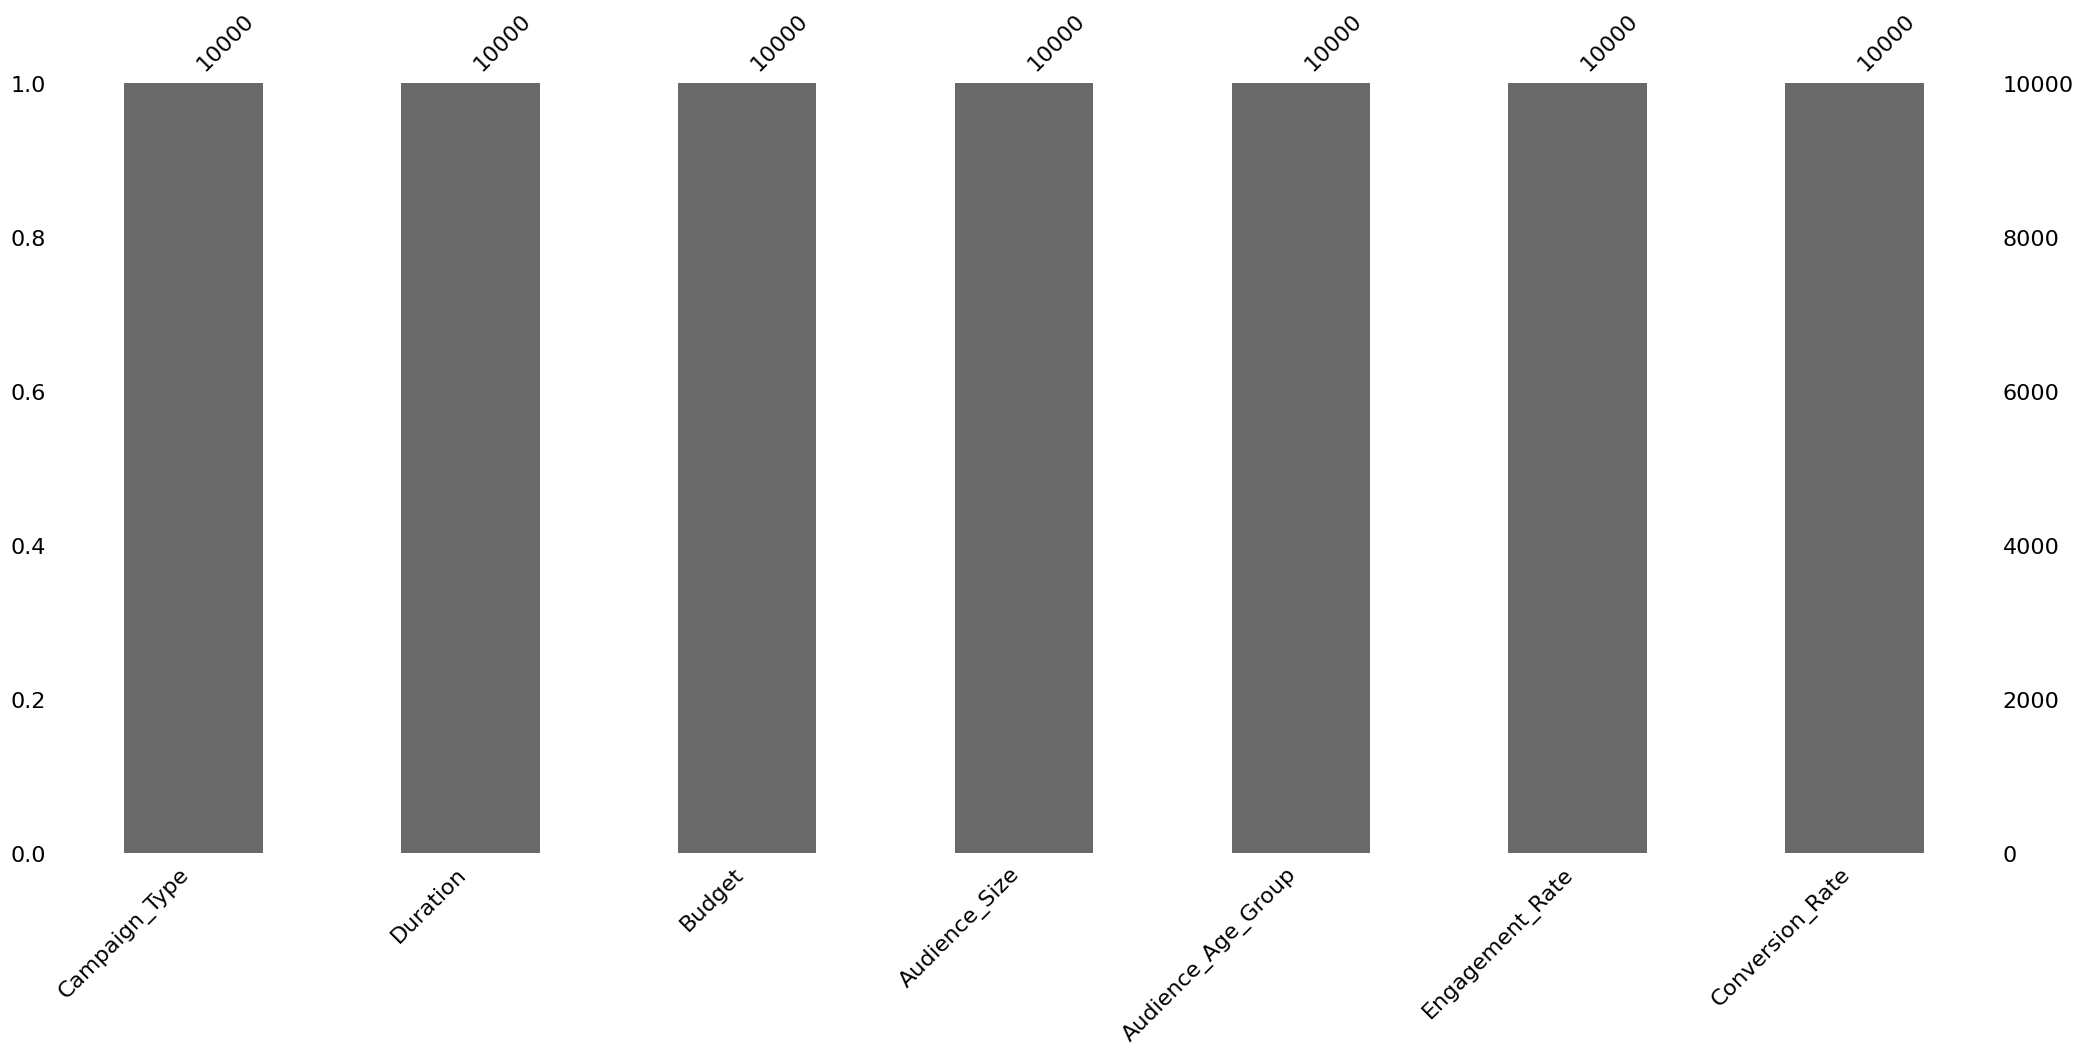

In [11]:
print(df.isnull().sum() * 100 / len(df)) #No missing value.
print('---------------------------')
df.duplicated().value_counts() #is there any duplicated value? -> False : 10000
print('-------------------------------')
msno.bar(df) 

In [4]:
col = []
d_type = []
uniques = []
n_uniques = []
for i in df.columns:
    col.append(i)
    d_type.append(df[i].dtypes)
    uniques.append(df[i].unique()[:10])
    n_uniques.append(df[i].nunique())

insight_df=pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_values': uniques, 'n_uniques': n_uniques})
insight_df

,Column,d_type,unique_values,n_uniques
0,Campaign_Type,object,"[Instagram, YouTube, Snapchat, Facebook, TikTok]",5
1,Duration,int64,"[45, 26, 50, 41, 40, 42, 33, 58, 6, 27]",59
2,Budget,float64,"[95.80276112896576, 84.12352444124747, 91.6880...",10000
3,Audience_Size,int64,"[75579, 88376, 99427, 40325, 10775, 85995, 237...",9523
4,Audience_Age_Group,object,"[35-44, 18-24, 25-34, 45-54, 55-64]",5
5,Engagement_Rate,float64,"[7.775562903000708, 1.971575504316236, 5.50462...",10000
6,Conversion_Rate,float64,"[1.890406068991072, 4.269138601926646, 0.70280...",10000


<Axes: xlabel='Duration'>

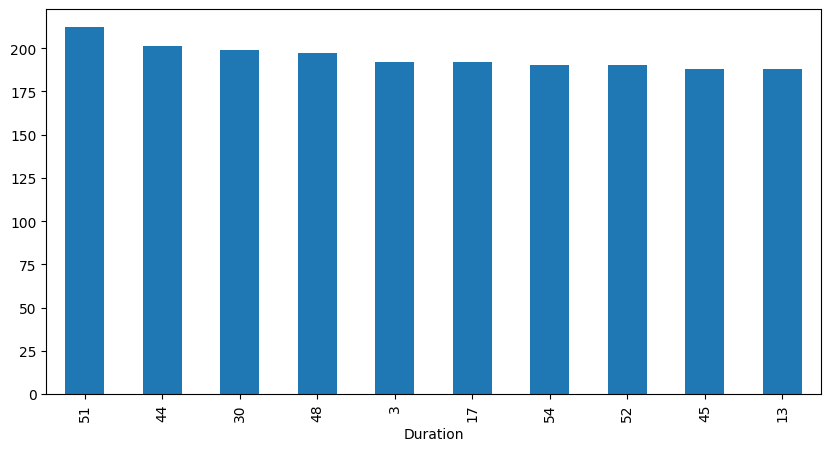

In [5]:
df['Duration'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5)) #nlargest=values  ->TODO:30dan büyükse 1 ay oldu mu kolonuna 1 olmadıysa 0 yapabılırız.

<Axes: xlabel='Duration hue with Campaign_Type', ylabel='Count'>

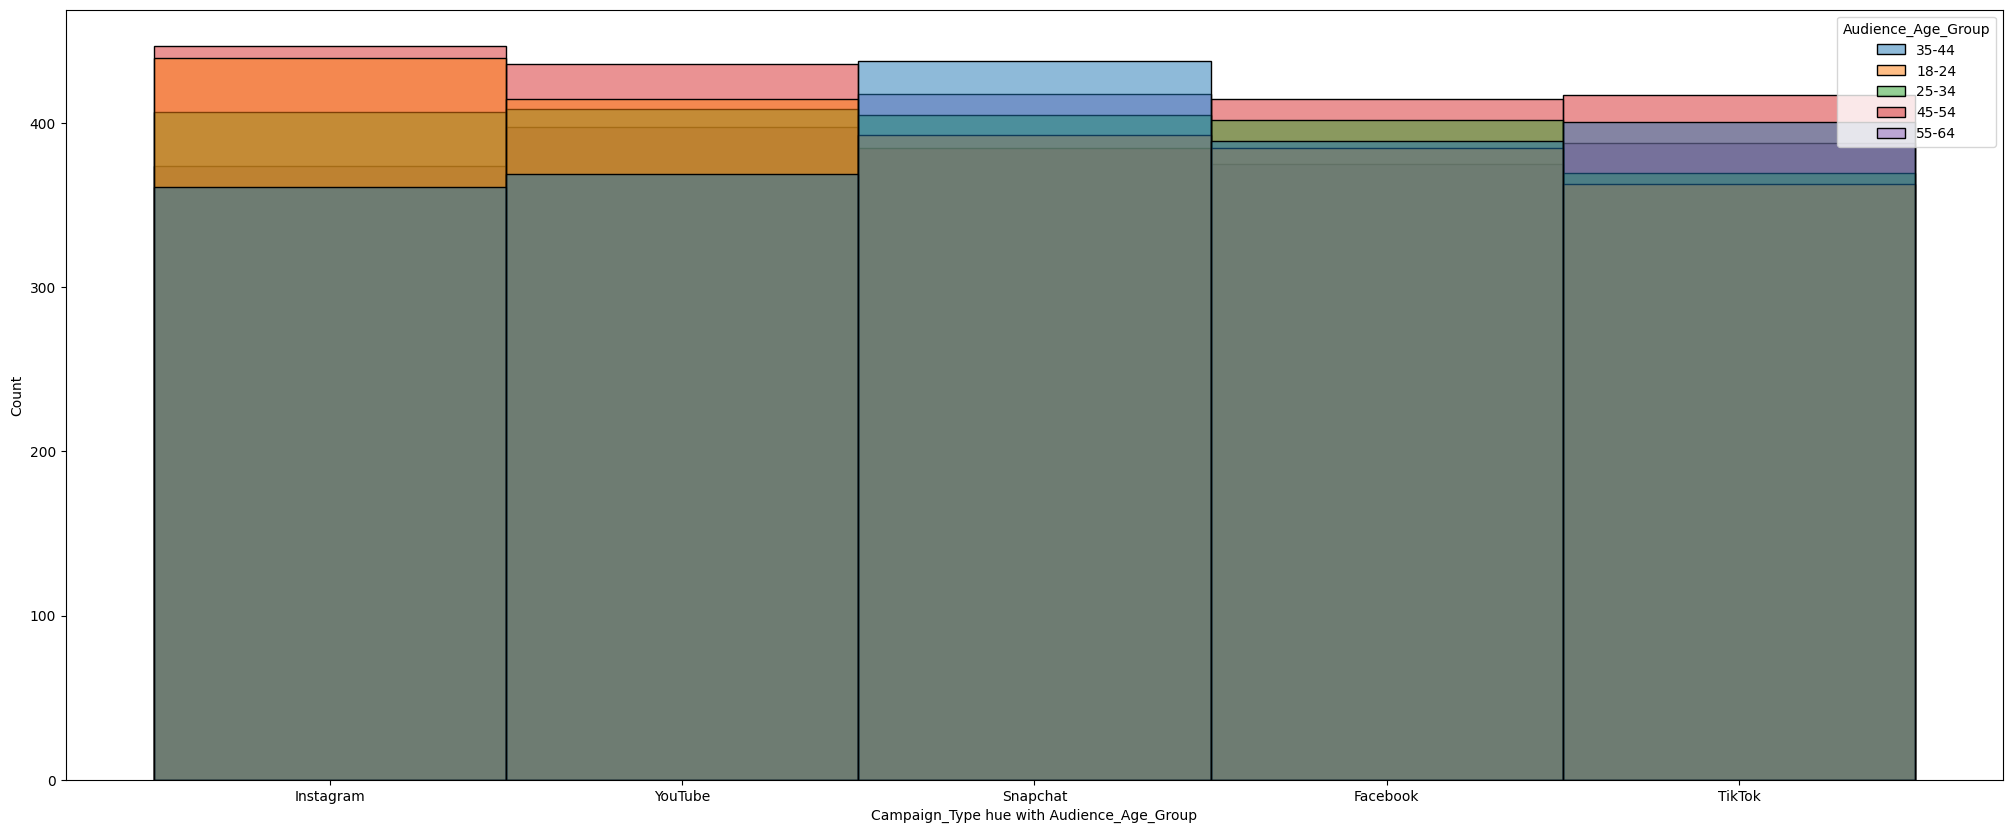

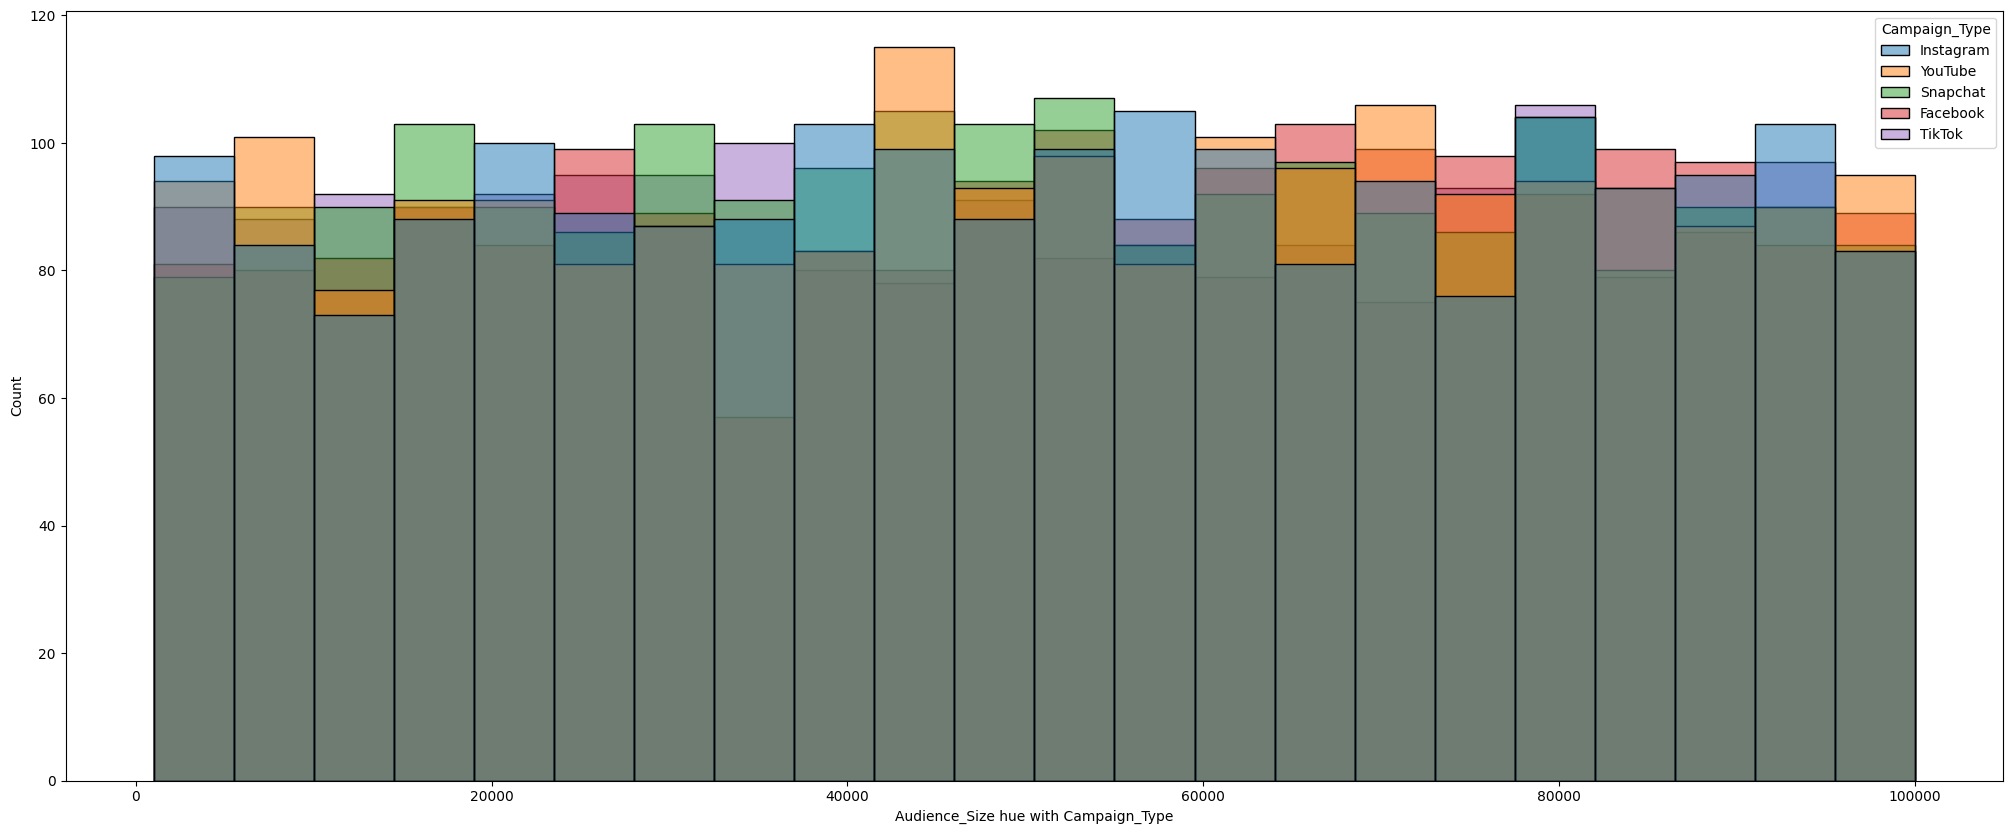

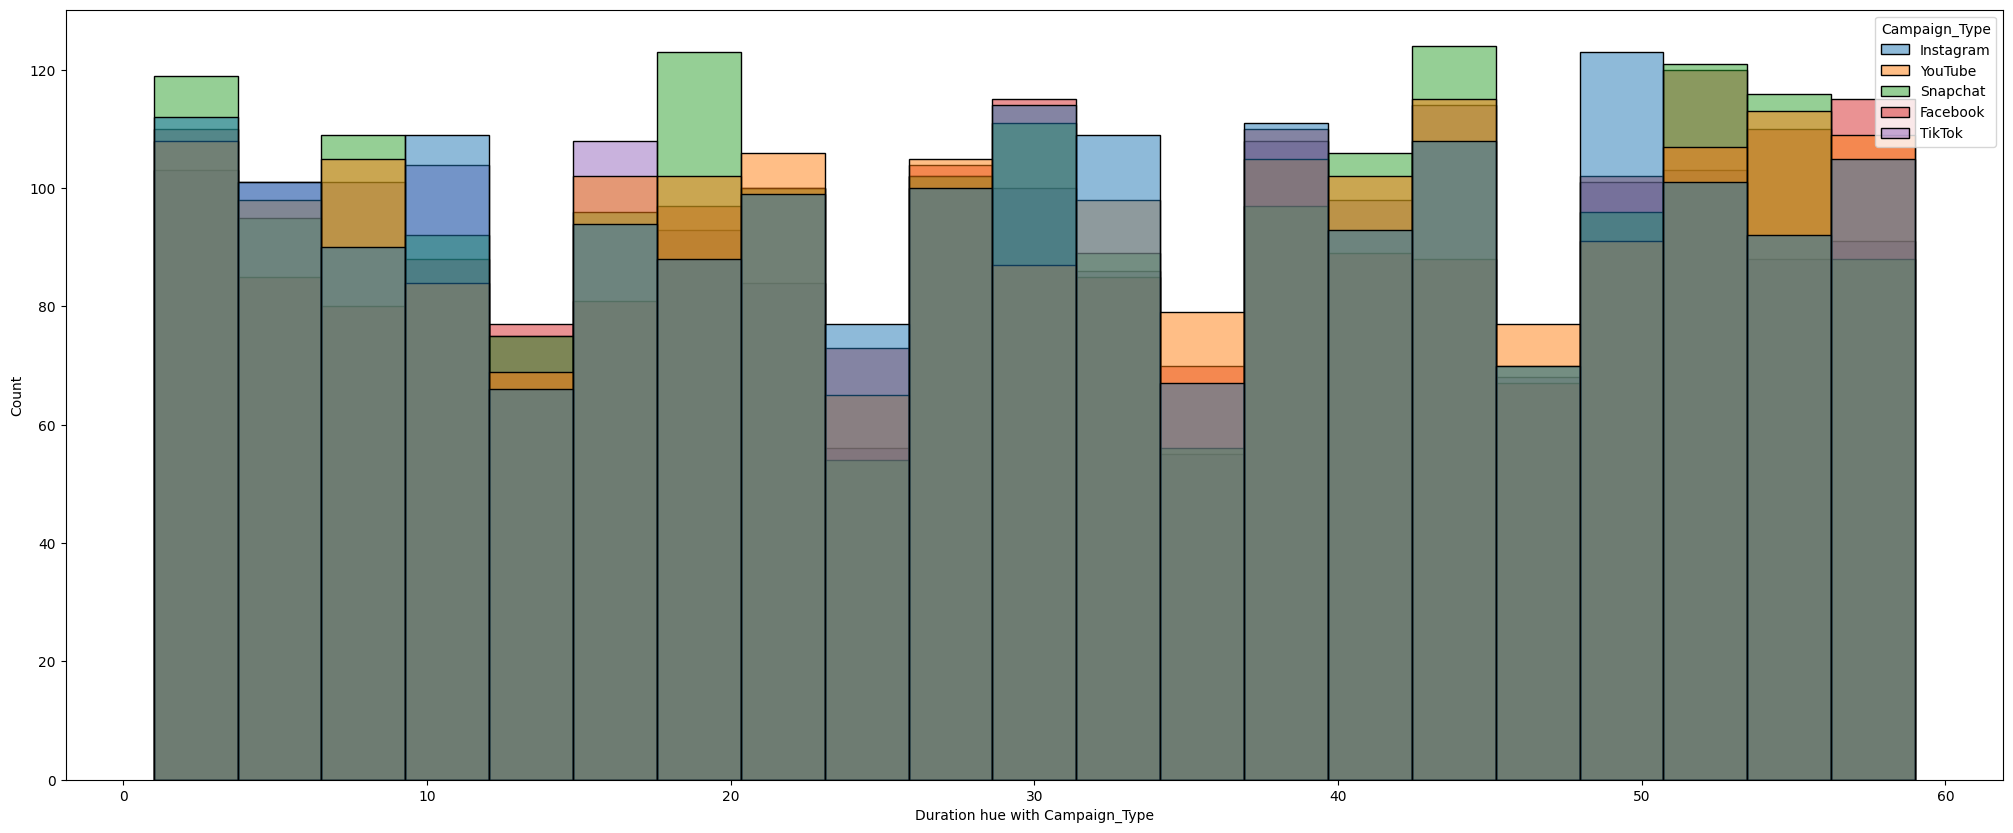

In [9]:
plt.figure(figsize=(25,10))
plt.xlabel('Campaign_Type hue with Audience_Age_Group')
sns.histplot(x=df["Campaign_Type"],hue='Audience_Age_Group',data=df)

plt.figure(figsize=(25,10))
plt.xlabel('Audience_Size hue with Campaign_Type')
sns.histplot(x=df["Audience_Size"],hue='Campaign_Type',data=df)
 
plt.figure(figsize=(25,10))
plt.xlabel('Duration hue with Campaign_Type')
sns.histplot(x=df["Duration"],hue='Campaign_Type',data=df)



# Heatmap

(7.5, -0.5)

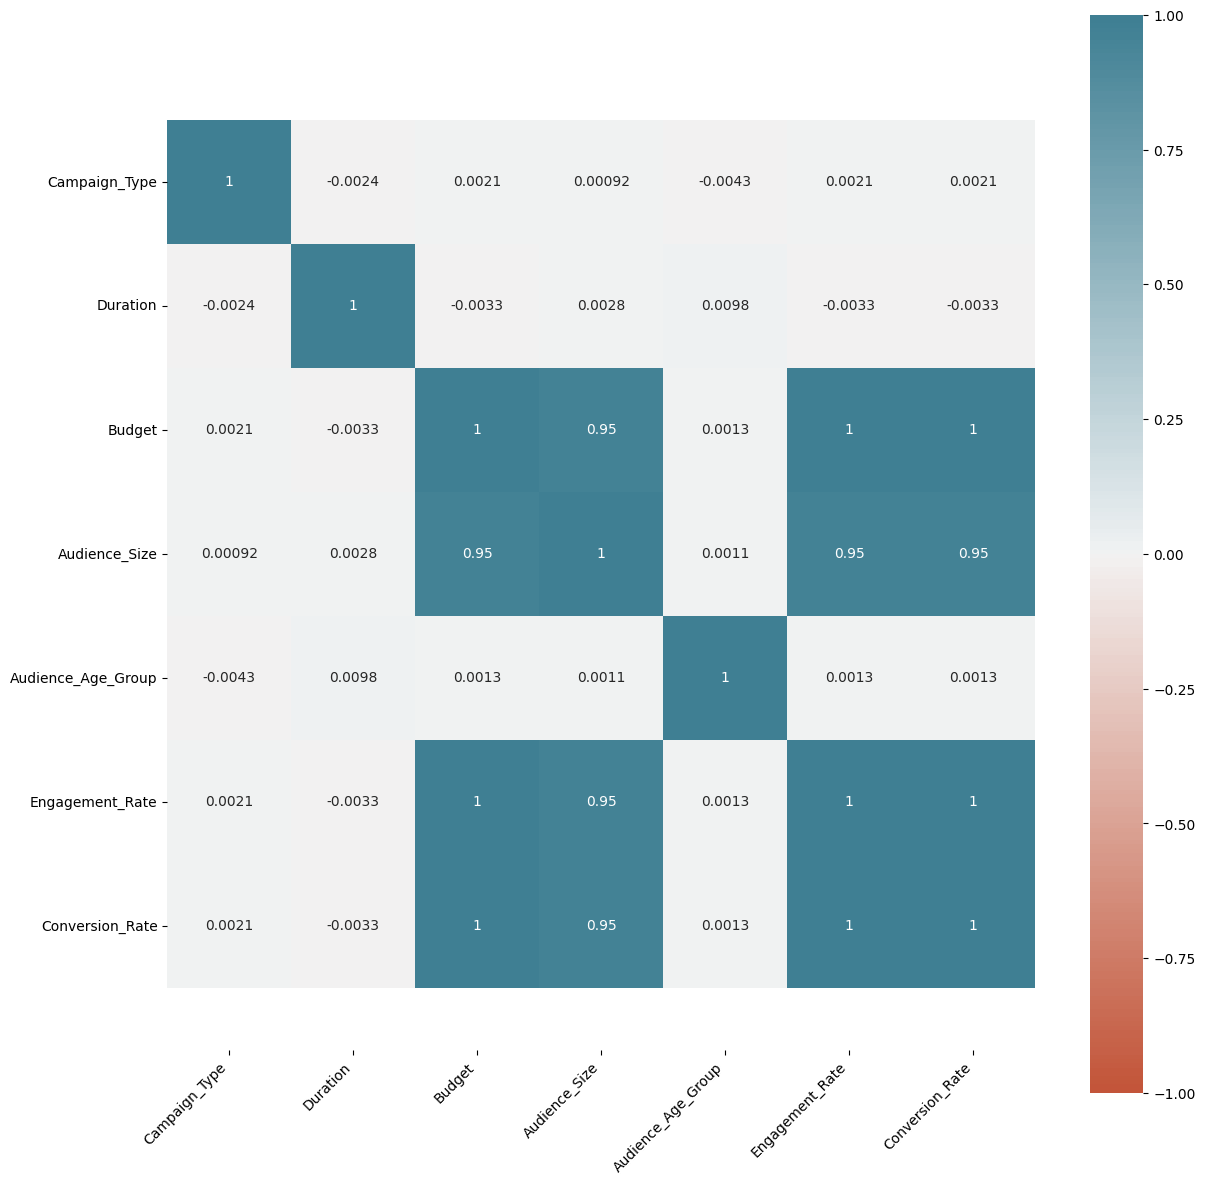

In [12]:
corr_df = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_df

# Corelation heatmap
corr = corr_df

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5)


# If we need use Transformation,: -Scaling,Outlier, 

# Feature Engineering

In [ ]:
# Shift and lag features


# Train test split and model

# Hyperparameter with GridSearch And Optuna

# Error Analysis

# Pickle model